In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#for interactivity
from ipywidgets import interact

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Crop Recommendation/Crop_recommendation.csv')
df.shape

(2200, 8)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
@interact
def summary(crops = list(df['label'].value_counts().index)):
    x = df[df['label']== crops]
    z = df.drop(['label'],axis=1)
    y = []
    y.append(z)
    for i in z:
        print('Minimum', i, 'required', x[i].min())
        print('Average', i, 'required', x[i].mean())
        print('Maximum', i, 'required', x[i].max())
        print('--------------------------------------------------')

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [ ]:
df.skew()

<ipython-input-9-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


N              0.509721
P              1.010773
K              2.375167
temperature    0.184933
humidity      -1.091708
ph             0.283929
rainfall       0.965756
dtype: float64

array([[<Axes: title={'center': 'N'}>, <Axes: title={'center': 'P'}>,
        <Axes: title={'center': 'K'}>,
        <Axes: title={'center': 'temperature'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'rainfall'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

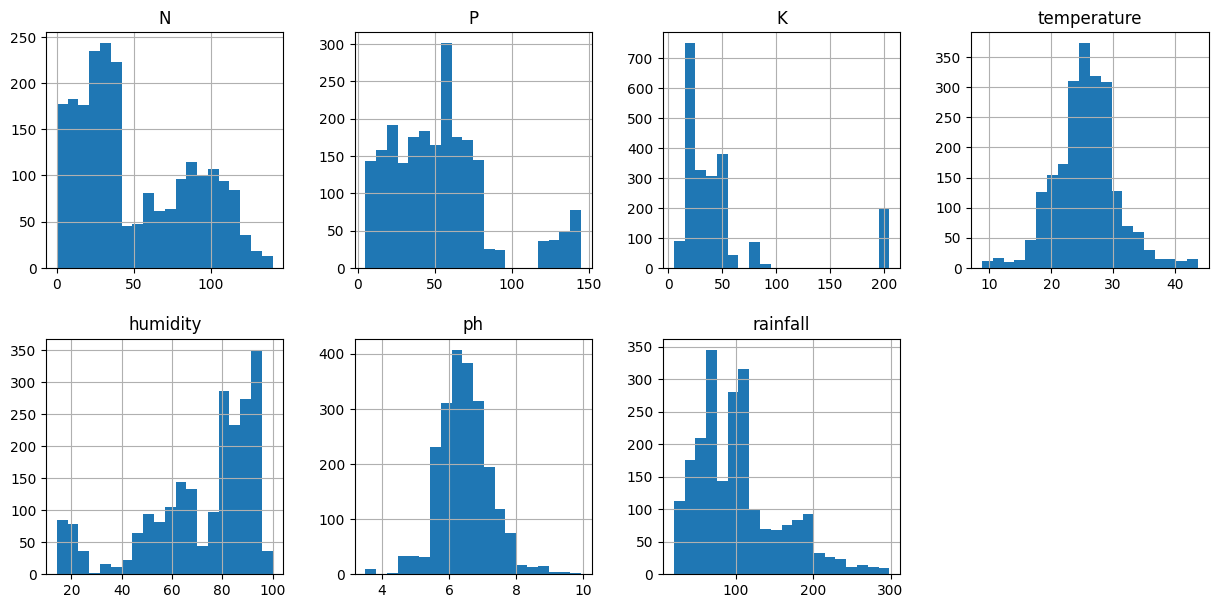

In [ ]:
df.hist(figsize=(15,15), layout=(4,4), bins=20)

observation:
1. P is right skewed
2. Humidity left skewed

In [ ]:
print('crops which requires very high ratio of Nitrogen content in soil:', df[df['N']>120]['label'].unique())
print('crops which requires very high ratio of Phosphorous content in soil:', df[df['P']>100]['label'].unique())
print('crops which requires very high ratio of Potassium content in soil:', df[df['K']>200]['label'].unique())
print('crops which requires very high rainfall:', df[df['rainfall']>200]['label'].unique())
print('crops which requires very low temperature:', df[df['temperature']<10]['label'].unique())
print('crops which requires very high temperature:', df[df['temperature']>40]['label'].unique())
print('crops which requires very low humidity:', df[df['humidity']<20]['label'].unique())
print('crops which requires very low ph:', df[df['ph']<4]['label'].unique())
print('crops which requires very high ph:', df[df['ph']>9]['label'].unique())

crops which requires very high ratio of Nitrogen content in soil: ['cotton']
crops which requires very high ratio of Phosphorous content in soil: ['grapes' 'apple']
crops which requires very high ratio of Potassium content in soil: ['grapes' 'apple']
crops which requires very high rainfall: ['rice' 'papaya' 'coconut']
crops which requires very low temperature: ['grapes']
crops which requires very high temperature: ['grapes' 'papaya']
crops which requires very low humidity: ['chickpea' 'kidneybeans']
crops which requires very low ph: ['mothbeans']
crops which requires very high ph: ['mothbeans']


observation:

we can see mothbeens grow in very low and very high pH conditions so pH is not a major factor for mothbeens

In [ ]:
print('Summer Crops:', df[(df['temperature']>30) & (df['humidity']>50)]['label'].unique())
print('Winter Crops:', df[(df['temperature']<20) & (df['humidity']>30)]['label'].unique())
print('Rainy Crops:', df[(df['rainfall']>200) & (df['humidity']>30)]['label'].unique())

Summer Crops: ['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
Winter Crops: ['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
Rainy Crops: ['rice' 'papaya' 'coconut']


In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
z = df.drop(['label'],axis=1)
z = df.loc[:,z.columns].values
x_df = pd.DataFrame(z)
x_df.head()

,0,1,2,3,4,5,6
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340


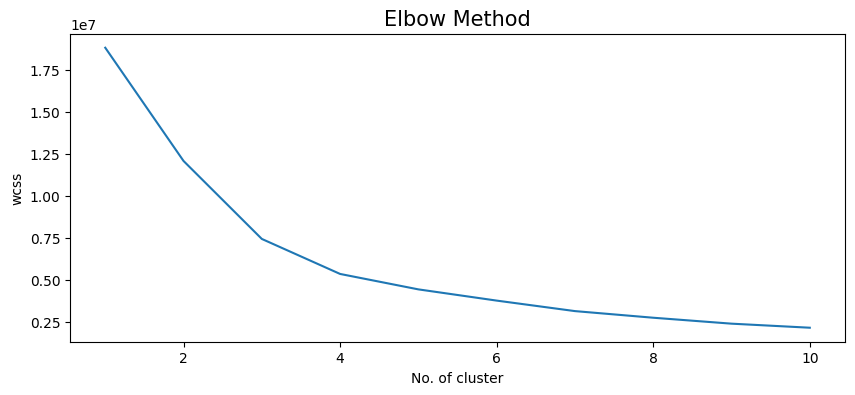

In [ ]:
#Determine Optimum number of cluster by elbow method
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (10,4)
wcss = []
for i in range (1,11):
    km = KMeans(n_clusters =i, init= 'k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(z)
    wcss.append(km.inertia_)

#plot the results
plt.plot(range(1,11), wcss)
plt.title('Elbow Method', fontsize= 15)
plt.xlabel('No. of cluster')
plt.ylabel('wcss')
plt.show()

Observation:

we get two elbows at 3 and 4. As per elbow method definition we take the last one
so our no. of cluster will be #4

In [ ]:
km = KMeans(n_clusters =4, init= 'k-means++', max_iter=300, n_init=10, random_state=0)
y_means= km.fit_predict(z)

a = df['label']
y_means = pd.DataFrame(y_means)
w = pd.concat([y_means, a], axis=1)
w =w.rename(columns= {0:'cluster'})

In [ ]:
#Check Cluster of each group

for i in range(0,4): #for 4 clusters 0,1,2,3
    print('Crops is cluster', i, w[w['cluster']==i]['label'].unique())
    print('---------------------------------------------------------------------------------------')

Crops is cluster 0 ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
---------------------------------------------------------------------------------------
Crops is cluster 1 ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
---------------------------------------------------------------------------------------
Crops is cluster 2 ['grapes' 'apple']
---------------------------------------------------------------------------------------
Crops is cluster 3 ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
---------------------------------------------------------------------------------------


Observation:

some of the crops are more than in one cluster. This is known as soft clustering

We want our crops to be in single cluster so next step we are going to do hard clustering

In hard clustering we can able to see each data points are completely in one cluster or not

In [ ]:
for i in range(0,4):
    counts=w[w['cluster']==i]['label'].value_counts()
    d = w.loc[w['label'].isin(counts.index[counts>=50])]
    d=d['label'].value_counts()
    print('Crops in Cluster', i,':', list(d.index))
    print('--------------------------------------------------------------------------------')

Crops in Cluster 0 : ['chickpea', 'kidneybeans', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'mango', 'orange']
--------------------------------------------------------------------------------
Crops in Cluster 1 : ['maize', 'banana', 'watermelon', 'muskmelon', 'cotton']
--------------------------------------------------------------------------------
Crops in Cluster 2 : ['grapes', 'apple']
--------------------------------------------------------------------------------
Crops in Cluster 3 : ['rice', 'pigeonpeas', 'papaya', 'coconut', 'jute', 'coffee']
--------------------------------------------------------------------------------


Text(0.5, 0, 'rainfall')

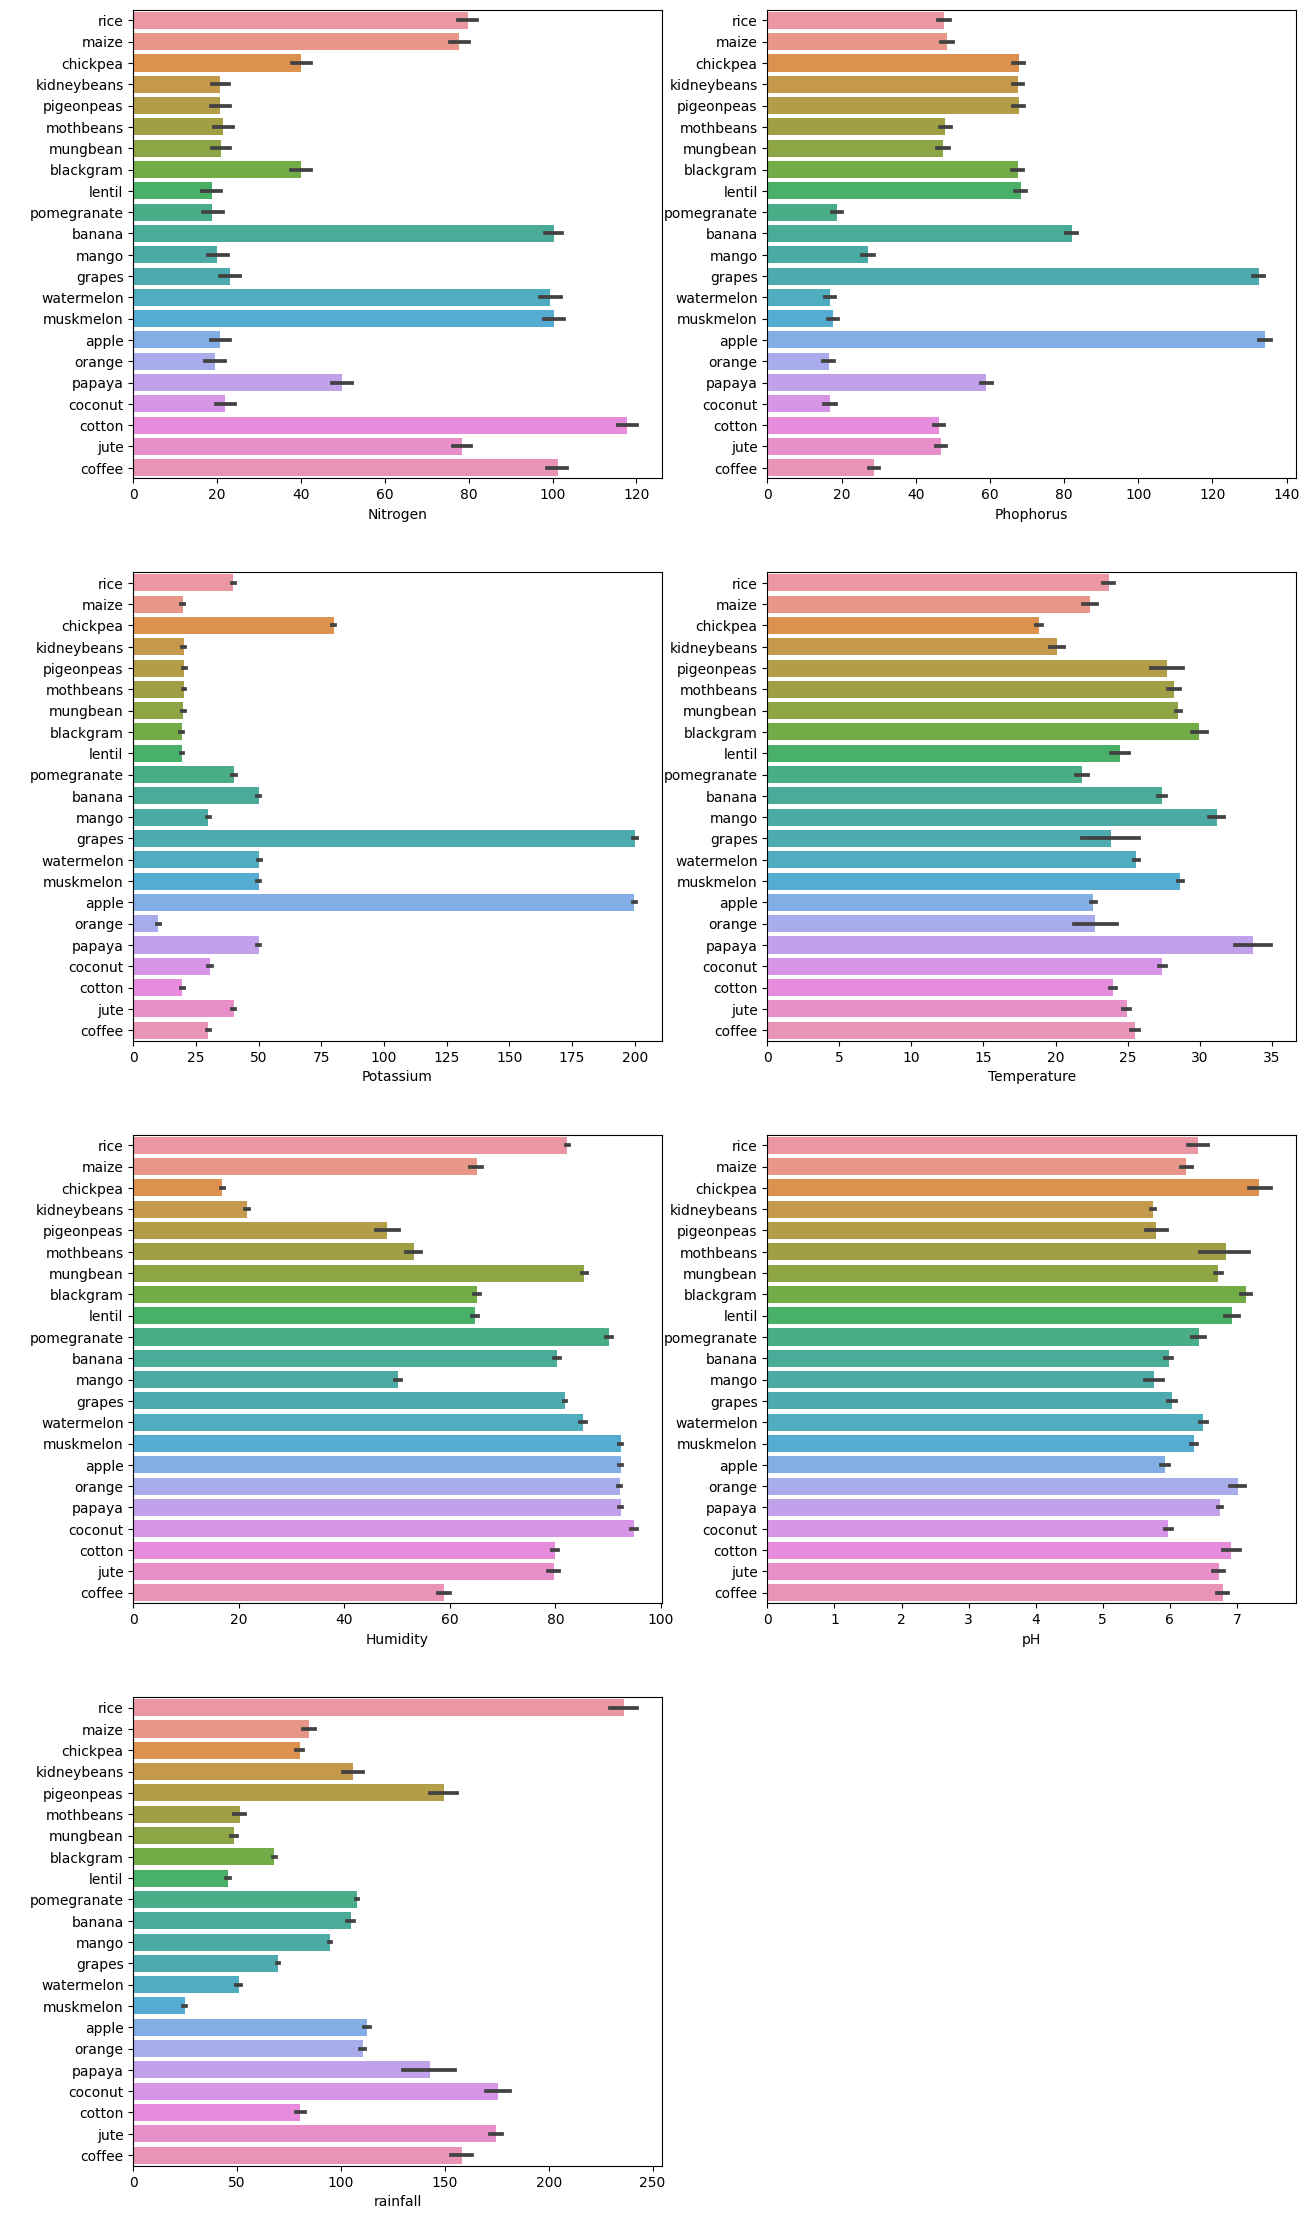

In [ ]:
plt.figure(figsize=(15, 28))
plt.subplot(4,2,1)
sns.barplot(x=df['N'], y=df['label'])
plt.ylabel(' ')
plt.xlabel('Nitrogen')
plt.subplot(4,2,2)
sns.barplot(x=df['P'], y=df['label'])
plt.ylabel(' ')
plt.xlabel('Phophorus')
plt.subplot(4,2,3)
sns.barplot(x=df['K'], y=df['label'])
plt.ylabel(' ')
plt.xlabel('Potassium')
plt.subplot(4,2,4)
sns.barplot(x=df['temperature'], y=df['label'])
plt.ylabel(' ')
plt.xlabel('Temperature')
plt.subplot(4,2,5)
sns.barplot(x=df['humidity'], y=df['label'])
plt.ylabel(' ')
plt.xlabel('Humidity')
plt.subplot(4,2,6)
sns.barplot(x=df['ph'], y=df['label'])
plt.ylabel(' ')
plt.xlabel('pH')
plt.subplot(4,2,7)
sns.barplot(x=df['rainfall'], y=df['label'])
plt.ylabel(' ')
plt.xlabel('rainfall')
#apply for loop


**Observation**
1. Cotton requires high amount of Nitrogen among all
2. Grapes and Apple requires very high amount of phosphorus and Potassium
3. least amount of potassium is the favorable condition of Orange to grow
4. Papaya requires more than 30 degree to grow well whereas others required <= 30 degree
5. chickpea and kidneybeans humidity requires very less humidity to grow
6. All crops require more than pH value of 5 to grow
7. Rice requires very heavy rainfall (more than 200mm) where the muskmelon requires the least


In [ ]:
x = df.drop(['label'], axis=1)
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [ ]:
y = df['label']
y.head()

0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object

In [ ]:
print('shape of x:', x.shape)
print('shape of y:', y.shape)

shape of x: (2200, 7)
shape of y: (2200,)


In [ ]:

y.value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(x_train,y_train)
y_pred1 = clf_knn.predict(x_test)
print("Accuracy Score of KNN:",accuracy_score(y_test,y_pred1))

from sklearn.svm import SVC
clf_svc = SVC()
clf_svc.fit(x_train,y_train)
y_pred2 = clf_svc.predict(x_test)
print("Accuracy Score of SVC:",accuracy_score(y_test,y_pred2))

from sklearn.tree import DecisionTreeClassifier
clf_dtc = DecisionTreeClassifier(criterion='entropy',random_state=7)
clf_dtc.fit(x_train,y_train)
y_pred3 = clf_dtc.predict(x_test)
print("Accuracy Score of decision tree:",accuracy_score(y_test,y_pred3))

from sklearn.ensemble import RandomForestClassifier
clf_rfc = RandomForestClassifier(random_state=1)
clf_rfc.fit(x_train, y_train)
y_pred4 = clf_rfc.predict(x_test)
print("Accuracy Score of Random Forest:",accuracy_score(y_test,y_pred4))

Accuracy Score of KNN: 0.9772727272727273
Accuracy Score of SVC: 0.9772727272727273
Accuracy Score of decision tree: 0.9931818181818182
Accuracy Score of Random Forest: 0.9977272727272727


Random forest gave us the best results

In [ ]:
y_train_pred = clf_rfc.predict(x_train)
print("Accuracy Score of Random Forest:",accuracy_score(y_train,y_train_pred))

Accuracy Score of Random Forest: 1.0


In [ ]:
output = pd.DataFrame({'Real_class': y_test, 'Predicted_class': y_pred4})
output.head()

,Real_class,Predicted_class
1320,watermelon,watermelon
1367,watermelon,watermelon
1291,grapes,grapes
264,chickpea,chickpea
728,blackgram,blackgram


In [ ]:
input = np.array([[90,42,43,20.879744,82.002744,6.502985,202.935536]])
clf_rfc.predict(input)

array(['rice'], dtype=object)

In [ ]:
output.to_csv('Optimizing Agricultural Production.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
